In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import graphviz
import mglearn

%matplotlib inline

In [101]:
df = pd.read_csv('data/forestfires.csv')

In [102]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [103]:
df.area.nunique()

251

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [105]:
df.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [106]:
data_conversion = pd.get_dummies(df, columns=["month","day"])

In [107]:
data_conversion.shape

(517, 30)

In [108]:
data_y = data_conversion["area"]
data_x = data_conversion.drop(columns=["area"])
data_x.shape, data_y.shape

((517, 29), (517,))

In [109]:
data_np_x = np.array(data_x)
data_np_y = np.array(data_y)
data_np_x.shape, data_np_y.shape

((517, 29), (517,))

In [110]:
train_x, test_x, train_y, test_y = train_test_split(data_np_x, data_np_y, test_size=0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((413, 29), (104, 29), (413,), (104,))

In [111]:
def test_model(model, train_x, test_x, train_y, test_y):
    model.fit(train_x, train_y)
    print('Performance:{}, {}'.format(model.score(train_x, train_y), model.score(test_x, test_y)))
    pass

In [112]:
test_model(KNeighborsRegressor(), train_x, test_x, train_y, test_y)
test_model(LinearRegression(), train_x, test_x, train_y, test_y)
test_model(DecisionTreeRegressor(), train_x, test_x, train_y, test_y)
test_model(RandomForestRegressor(), train_x, test_x, train_y, test_y)
test_model(LinearSVR(), train_x, test_x, train_y, test_y)
test_model(SVR(), train_x, test_x, train_y, test_y)

Performance:0.2625017855077951, -2.8706458237445793
Performance:0.050909366104198606, -1.3106982567334509
Performance:0.9999216939342821, -34.46293995516603
Performance:0.7294119096653274, -7.441619527823624
Performance:-0.007439218225973043, -1.680039809694919
Performance:-0.0310224718447214, -0.1689895420682488


- 성능 너무 안나온다..

# Clustering

In [113]:
from sklearn.decomposition import PCA

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5d8500cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e5d85055f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e5d8500ba8>,
 'medians': [<matplotlib.lines.Line2D at 0x1e5d8505e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e5d850f2b0>,
 'means': []}

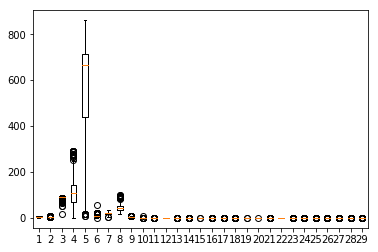

In [114]:
plt.boxplot(data_np_x)

- 아 정규화가 필요해 보인다 ㄷㄷ

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler().fit(data_np_x)
x = scaler.transform(data_np_x)

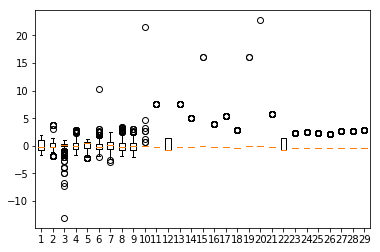

In [117]:
ax = plt.boxplot(x)

In [118]:
pca = PCA(n_components=2).fit(x)
pca_train_x = pca.transform(train_x)
pca_test_x = pca.transform(test_x)

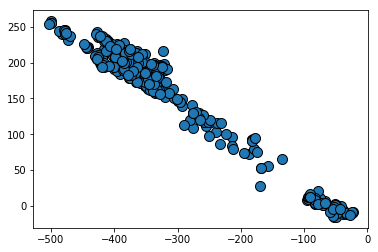

In [119]:
mglearn.discrete_scatter(pca_train_x[:,0], pca_train_x[:,1])

In [120]:
from sklearn.cluster import KMeans

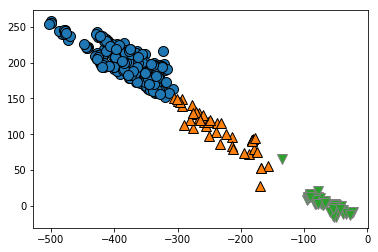

In [122]:
km = KMeans(n_clusters=3).fit(pca_train_x)
mglearn.discrete_scatter(pca_train_x[:,0], pca_train_x[:,1], km.labels_)